### Convolutional Neural Network - Simple

Create a simple convolutional network and train a model with the train set. You can start from the architecture proposed by Chollet, Listing 5.5, and a small number of epochs. Use the ImageDataGenerator class to scale your images as in the book:
- You will need to modify some parameters so that your network handles **multiple classes**.
    - Last Layer activation `softmax`
    - Loss function `categorical_crossentropy`
- You will also adjust the **number of steps** so that your generator in the fitting procedure sees all the samples.
- You will report the training and validation losses and accuracies and comment on the possible overfit.

#### Scale Images

In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

TRAIN_DIR = 'flowers_split/train'
VAL_DIR = 'flowers_split/validation'
TEST_DIR = 'flowers_split/test'


train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory( 
    VAL_DIR,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory( 
    TEST_DIR,
    target_size=(150, 150),
    batch_size=20,
    shuffle=False,
    class_mode='categorical')


Using TensorFlow backend.


Found 2654 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


In [3]:
print("Train")
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
print("Validation")
for data_batch, labels_batch in validation_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
print("Test")
for data_batch, labels_batch in test_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


Train
data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 5)
Validation
data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 5)
Test
data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 5)


#### Build Model

In [4]:
from keras import layers
from keras import models

model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3)
        , activation='relu'
        ,input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) 
# model.add(layers.Dense(1, activation='sigmoid'))
model.add(layers.Dense(5, activation = "softmax"))

#### Compile

In [5]:
from keras import optimizers
model.compile(loss='categorical_crossentropy'
              , optimizer=optimizers.RMSprop(lr=1e-4)
              , metrics=['acc'])

#### Fit the model

In [6]:
history = model.fit_generator( 
      train_generator,
      steps_per_epoch=2654//20,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=865//20)

Epoch 1/10
132/132 [==============================] - 49s 369ms/step - loss: 1.3187 - acc: 0.4233 - val_loss: 1.2110 - val_acc: 0.5047
Epoch 2/10
132/132 [==============================] - 55s 413ms/step - loss: 1.1330 - acc: 0.5289 - val_loss: 1.0077 - val_acc: 0.5278
Epoch 3/10
132/132 [==============================] - 50s 380ms/step - loss: 1.0471 - acc: 0.5793 - val_loss: 1.2215 - val_acc: 0.5479
Epoch 4/10
132/132 [==============================] - 52s 391ms/step - loss: 0.9828 - acc: 0.6147 - val_loss: 1.2154 - val_acc: 0.5598
Epoch 5/10
132/132 [==============================] - 49s 372ms/step - loss: 0.9268 - acc: 0.6424 - val_loss: 0.6028 - val_acc: 0.6237
Epoch 6/10
132/132 [==============================] - 49s 374ms/step - loss: 0.8859 - acc: 0.6484 - val_loss: 0.7999 - val_acc: 0.6414
Epoch 7/10
132/132 [==============================] - 48s 367ms/step - loss: 0.8200 - acc: 0.6886 - val_loss: 0.5509 - val_acc: 0.6225
Epoch 8/10
132/132 [==============================] - 5

#### Save the model

In [6]:
model.save('flower_picker_x1000.h5')

#### Load the model

In [ ]:
from keras.models import load_model
model = load_model('flower_picker_x1000.h5')

#### Display Loss and Acc

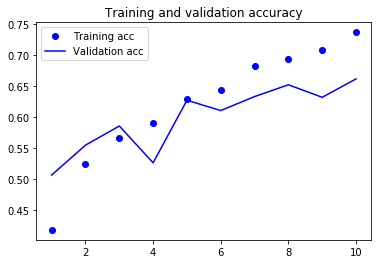

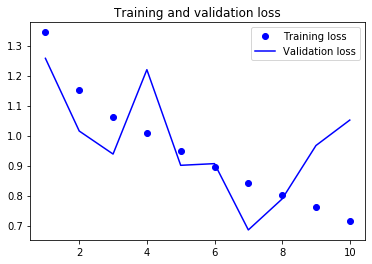

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Predict

In [7]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50) 
print('test acc:', test_acc)
print('test loss:', test_loss)

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


test acc: 0.7238578796386719
test loss: 0.5307108163833618
Confusion Matrix
[[143  16   4   5   7]
 [ 19 160   0  19   5]
 [ 29  14  74   4  37]
 [  8  12   3 114   3]
 [ 17  12  20  13 127]]
Classification Report
              precision    recall  f1-score   support

       Daisy       0.55      0.79      0.65       150
   Dandelion       0.70      0.69      0.69       216
        Rose       0.68      0.43      0.53       159
   Sunflower       0.68      0.74      0.71       141
       Tulip       0.71      0.64      0.67       199

    accuracy                           0.66       865
   macro avg       0.66      0.66      0.65       865
weighted avg       0.67      0.66      0.65       865

